# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem defition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [3]:
# Import the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
# Import the data sets
df = pd.read_csv('data/TrainAndValid.csv', low_memory = False)

In [3]:
df.shape

(412698, 53)

In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null object
saledate                    412698 non-null object
fiModelDesc                 412698 non-null object
fiBaseModel                 412698 non-null object
fiSecondaryDesc             271971 non-null object
fiModelSeries               58667 non-null object
fiModelDescriptor           74816 non-null object
ProductSize                 196093 non-null object
fiProductClassDesc          412698 non-null object
state                      

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000.]), <a list of 10 Text yticklabel objects>)

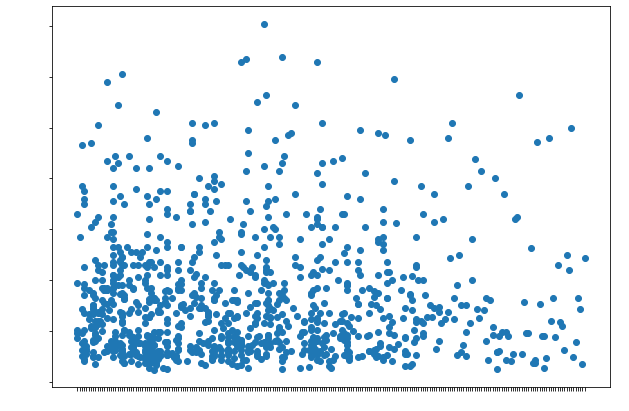

In [12]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])
plt.xticks(color = 'white')
plt.yticks(color = 'white')

In [10]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
5      12/18/2008 0:00
6       8/26/2004 0:00
7      11/17/2005 0:00
8       8/27/2009 0:00
9        8/9/2007 0:00
10      8/21/2008 0:00
11      8/24/2006 0:00
12     10/20/2005 0:00
13      1/26/2006 0:00
14       1/3/2006 0:00
15     11/16/2006 0:00
16      6/14/2007 0:00
17      1/28/2010 0:00
18       3/9/2006 0:00
19     11/17/2005 0:00
20      5/18/2006 0:00
21     10/19/2006 0:00
22     10/25/2007 0:00
23     10/19/2006 0:00
24      5/20/2004 0:00
25       3/9/2006 0:00
26       3/9/2006 0:00
27      2/22/2007 0:00
28       8/9/2007 0:00
29       6/1/2006 0:00
            ...       
970      3/9/2006 0:00
971     12/6/2007 0:00
972     3/22/2007 0:00
973     2/12/2004 0:00
974      8/6/2009 0:00
975     1/29/2004 0:00
976     11/2/2006 0:00
977      7/7/2011 0:00
978     10/4/2007 0:00
979    11/15/2007 0:00
980     6/15/2006 0:00
981     1/26/2006 0:00
982     4/2

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]), <a list of 9 Text yticklabel objects>)

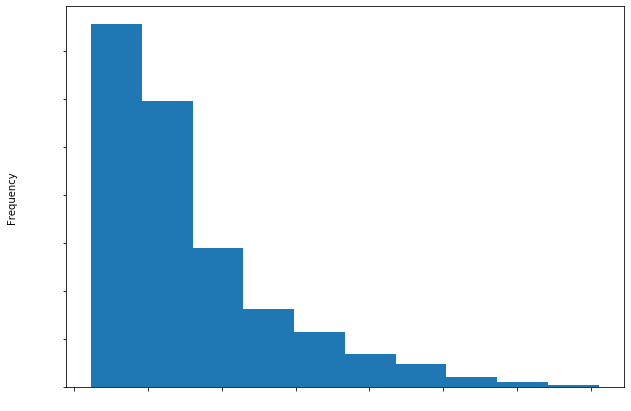

In [18]:
df['SalePrice'].plot.hist(figsize = (10, 7))
plt.xticks(color = 'white')
plt.yticks(color = 'white')

In [20]:
'''
-----------------------:PARSING THE DATES:----------------------------
When we work with time series data, we want to enrich the time and date component as much as possible,

We can do that by telling pandas which of our columns has dates in it by using the **parse_dates* parameter
''';

In [22]:
# Import data this time but parse the data that we import 
df = pd.read_csv("data/TrainAndValid.csv", 
                 low_memory = False,
                 parse_dates = ['saledate'])

In [23]:
df.saledate.dtype

dtype('<M8[ns]')

In [24]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

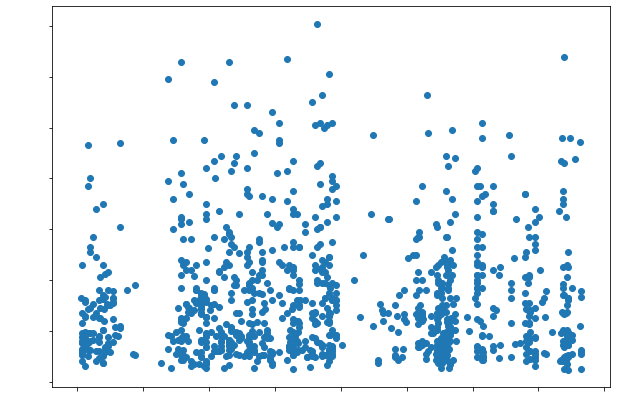

In [27]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])
plt.xticks(color = 'white')
plt.yticks(color = 'white');

In [28]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275,...,6333305,6333314,6333330,6333339,6333343,6333344,6333345,6333347,6333348,6333349
SalePrice,66000,57000,10000,38500,11000,26500,21000,27000,21500,65000,...,11500,13000,20500,13000,10000,10000,10500,12500,10000,13000
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474,...,1800259,1908162,1879923,1856845,1799614,1919201,1882122,1944213,1794518,1944743
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,...,21437,21437,21446,21435,21435,21435,21436,21435,21435,21436
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,3,3,3,3,3,3,3,3,3,3,...,1,2,2,2,1,2,2,2,2,2
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000,...,2006,2006,2006,2005,2005,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,68,4640,2838,3486,722,508,11540,4883,302,20700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00,2008-12-18 00:00:00,2004-08-26 00:00:00,2005-11-17 00:00:00,2009-08-27 00:00:00,2007-08-09 00:00:00,...,2012-02-13 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-02-13 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00


In [31]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [35]:
# Lets sort the same by the saledate
df.sort_values(by = ['saledate'], ascending = True, inplace = True)

In [39]:
# Reset the index and 
df.reset_index( drop = True, inplace = True)
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
5,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
6,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
7,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
8,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
9,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Make a copy 
df_temp = df.copy()

In [41]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [ ]:
# Let's enrich our data by some of the attributes of datetime
'''
FEATURE ENGINEERING
'''
# Add date time parameters for saledate column

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html

In [51]:
df_temp['saleyear'] = df_temp['saledate'].dt.year
df_temp['salemonth'] = df_temp['saledate'].dt.month
df_temp['saleday'] = df_temp['saledate'].dt.day
df_temp['saledayofweek'] = df_temp['saledate'].dt.dayofweek
df_temp['saledayofyear'] = df_temp['saledate'].dt.dayofyear


In [55]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [54]:
## Now we enriched the dataset so we donot need our saledate column
df_temp.drop('saledate',axis =1,  inplace = True) 

In [57]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

We've done enough EDA( we could always do more) but lets do some model driven EDA 

In [ ]:
# Let's build a machine leaarning model
'''
Here as it is evident and also given as a goal we ll go for sale price as our y 
and rest can be used 
'''
'''
Now which kind of a model should be used to make the things go on now
Lts see we can go for estimator map for this from sklearn
'''

In [4]:
#Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 42)

In [60]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null object
fiModelDesc                 412698 non-null object
fiBaseModel                 412698 non-null object
fiSecondaryDesc             271971 non-null object
fiModelSeries               58667 non-null object
fiModelDescriptor           74816 non-null object
ProductSize                 196093 non-null object
fiProductClassDesc          412698 non-null object
state                       412698 non-null object
ProductGroup               

In [61]:
# Here we have strings and we require to convert them to numeric 
# Even we want to insert the missing values

### Covert string into Categories
One way we can turn all our data into numbers is by converting them into pandas categories

https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html

In [63]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [64]:
# Data introspection methods
# Go to the links and we can easily find some useful documentation
pd.api.types.is_string_dtype(df_temp['UsageBand'])

True

In [86]:
for label, columns in df_temp.items():
    if pd.api.types.is_string_dtype(columns):
        print(label)
  
    

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [87]:
# This will turn all the strings into category values
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered() # as ordered makes it ordered

In [88]:
df_temp.info()
# we have changed them into categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null category
fiModelDesc                 412698 non-null category
fiBaseModel                 412698 non-null category
fiSecondaryDesc             271971 non-null category
fiModelSeries               58667 non-null category
fiModelDescriptor           74816 non-null category
ProductSize                 196093 non-null category
fiProductClassDesc          412698 non-null category
state                       412698 non-null category
ProductGr

In [90]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [91]:
df_temp.state.cat.codes


0         43
1          8
2          8
3          8
4          8
5          8
6          8
7          8
8          8
9          8
10         8
11         8
12         8
13         8
14         8
15         8
16         8
17         8
18         8
19         8
20         8
21         9
22         8
23         8
24         9
25         8
26         8
27         8
28         8
29         8
          ..
412668     4
412669     4
412670     4
412671     4
412672     4
412673     4
412674     4
412675     4
412676     4
412677     4
412678     4
412679     4
412680     4
412681     4
412682     4
412683     4
412684     4
412685     4
412686     4
412687     4
412688     4
412689     4
412690     4
412691     4
412692     4
412693     4
412694     4
412695     4
412696     4
412697     4
Length: 412698, dtype: int8

Thanks to pandas Categories we now have a way to access all of our data in form of numbers.

But we still have a bunch of missing data.....

In [92]:
# Check  missing data
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Save preprocessed data

this is very important to save the data as csv file because we need to contibue our work from where 
we left and dont need to rerun the notebook right from the start..

Hence saving the file is very imp.......


In [94]:
df_temp.to_csv("data/train_tmp_1.csv", index = False)

In [7]:
df_temp = pd.read_csv("data/train_tmp_1.csv" , low_memory = False)

In [4]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [5]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

# Fill the missing values

## Fill the numeric values

In [6]:
for model_name, data in df_temp.items():
    if pd.api.types.is_numeric_dtype(data):
        print(model_name)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [7]:
# HENCE THESE ARE THE ONES WE NEED TO FILL WITH NUMERIC DATA IN PLACE WHERE THERE IS NAN
# WE CAN DO IT WITH A SimpleImputer
df_temp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
5          4123
6          7620
7          8202
8          2759
9          3356
10         3356
11         7008
12         6788
13         7277
14         7289
15         7257
16         7277
17         7277
18         3356
19         3356
20         7464
21         4123
22         3371
23         8443
24         6788
25         7008
26         3406
27         7008
28         4124
29         8443
          ...  
412668     3362
412669     3218
412670     3263
412671     9508
412672    12524
412673     4605
412674     6868
412675    17231
412676     4605
412677    17231
412678     3192
412679     4605
412680     9550
412681    18110
412682     9550
412683     3239
412684     4605
412685     3180
412686    28919
412687    10402
412688     4701
412689    22072
412690    17311
412691     9114
412692    13976
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 4

In [8]:
#Check for which numeric types we have missing values and hence fill them
for model_name, data in df_temp.items():
    if pd.api.types.is_numeric_dtype(data):
           print(f'Nan of {model_name} : {df_temp[model_name].isna().sum()}')

Nan of SalesID : 0
Nan of SalePrice : 0
Nan of MachineID : 0
Nan of ModelID : 0
Nan of datasource : 0
Nan of auctioneerID : 20136
Nan of YearMade : 0
Nan of MachineHoursCurrentMeter : 265194
Nan of saleyear : 0
Nan of salemonth : 0
Nan of saleday : 0
Nan of saledayofweek : 0
Nan of saledayofyear : 0


In [9]:
for model_name, data in df_temp.items():
    if pd.api.types.is_numeric_dtype(data):
        if pd.isnull(data).sum():   ### Here we used the pandas .isnull() function
            print(model_name)

auctioneerID
MachineHoursCurrentMeter


In [8]:
#Hence we came to know that auctioneerID : 20136 && MachineHoursCurrentMeter : 265194
# hence we fill these only
## fill na 
for model_name, data in df_temp.items():
    if pd.api.types.is_numeric_dtype(data):
        if pd.isnull(data).sum():
            df_temp[model_name + 'is_missing'] = pd.isnull(data)
            df_temp[model_name].fillna(df_temp[model_name].median(), inplace = True)

In [12]:
## using median rather than mean is useful because 
# mean is more sensitive to outliers this means that say if we have a very high value then automatically
# the mean shifts towards the higher value and not the usual values
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,auctioneerIDis_missing,MachineHoursCurrentMeteris_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1989,1,31,1,31,False,True


In [14]:
#Hence we came to know that auctioneerID : 20136 && MachineHoursCurrentMeter : 265194
# we should have our binary columns true for these many columns
df_temp['auctioneerIDis_missing'].value_counts()

False    392562
True      20136
Name: auctioneerIDis_missing, dtype: int64

In [16]:
df_temp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

## Filling and turning categorical variables into numbers

In [23]:
## Check for columns which aren't numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [9]:
# Turn categorical variables into numbers and fill missing
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column whether sample had missing value
        df_temp[label + 'is_missing'] = pd.isnull(content)
        # Turn categories into numbers
        df_temp[label] = pd.Categorical(df_temp[label]).codes + 1
# Now here we did + 1 because we dont want our data to be having negative values so we do this
# NOw since we filled all the missing values because
# When we convert into codes the missing values actually get filled with some value zero

In [34]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,0,0,0,0,0
fiModelDesc,4593,1820,2348,1819,2119


In [36]:
df_temp.isna().sum()
# We find that there are no missing values and we are ready to build our model

SalesID                              0
SalePrice                            0
MachineID                            0
ModelID                              0
datasource                           0
auctioneerID                         0
YearMade                             0
MachineHoursCurrentMeter             0
UsageBand                            0
fiModelDesc                          0
fiBaseModel                          0
fiSecondaryDesc                      0
fiModelSeries                        0
fiModelDescriptor                    0
ProductSize                          0
fiProductClassDesc                   0
state                                0
ProductGroup                         0
ProductGroupDesc                     0
Drive_System                         0
Enclosure                            0
Forks                                0
Pad_Type                             0
Ride_Control                         0
Stick                                0
Transmission             

## Machine Learning Model

Now that all of our data is numeric and all of our data is numeric we can build a ml model now


In [10]:
%%time
# calculate the time to run the cell
# Instantiate the ml model
# Baseline random forest model 
model = RandomForestRegressor(n_jobs = -1, random_state = 42)
#Fit the model now
model.fit(df_temp.drop('SalePrice', axis = 1), df_temp['SalePrice'])


C:\Users\Himanshu Mohanty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 26.4 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [11]:
## SCORE the model
model.score(df_temp.drop('SalePrice', axis = 1), df_temp['SalePrice'])
# Here it is returning the coefficient of determination 

0.981983058217954

**Question**

Why doesn't the above metric hold water? Why is it not reliable?

In [ ]:
#Here we actually provided the data same as we trained it on
# Hence we should split it
# Without that it would be of no use

In [45]:
# Hence in the question we are given till 2011 we ll train and 2012 is validation
# In order to evaluate the same

In [46]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [48]:
df_temp.saleyear.value_counts()
# Hence we have 11573 2012 samples and so we wanna strip it out for our validation set

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleyear, dtype: int64

In [12]:
X_train = df_temp[df_temp['saleyear'] != 2012].drop('SalePrice', axis = 1)

In [57]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [13]:
y_train = df_temp[df_temp['saleyear'] != 2012].SalePrice

In [14]:
X_valid = df_temp[df_temp['saleyear'] == 2012].drop('SalePrice', axis = 1)
y_valid = df_temp[df_temp['saleyear'] == 2012].SalePrice

In [13]:
len(X_valid)

11573

In [14]:
# Hence we achieved what we wanted to
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((401125, 102), (11573, 102), (401125,), (11573,))

In [15]:
# We are actually provided with a evaluation methodology and hence we need to use that 
# That is
# RMSLE -----> Root Mean Square Log Error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

In [16]:
## Building our own evaluation function:
# Create evaluation function to use it multiple times:
def rmsle(y_test, y_preds):
    '''
    Calculates the root mean squared log error between predictions and 
    true labels
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [17]:
# Create function to evaluate model on a few different levels
def scores(model):
    y_train_preds = model.predict(X_train)
    y_valid_preds = model.predict(X_valid)
    score_dict = {'The train Mae': mean_absolute_error(y_train, y_train_preds),
                  'The valid Mae': mean_absolute_error(y_valid, y_valid_preds),
                  'The train Rmsle': rmsle(y_train, y_train_preds),
                  'The valid Rmsle': rmsle(y_valid, y_valid_preds),
                  'The train r2 score': r2_score(y_train, y_train_preds),
                  'The valid r2 score': r2_score(y_train, y_train_preds)}
    return score_dict

In [23]:
## Since we know that it takes a lot of time to actually fit the model having 400k samples we can make 
# the process more simpler by reducing the data by slicing ofcourse 
# But here we do that by actually using an inbuilt function called max_samples

In [24]:
# A very good choice would be using a less no of samples 

## This is quite a useful practise to do our hyper parameter tuning 

In [23]:
%%time
# here n_estimators are by_default 100 
# so 100*400k is quite larger than 100*10000 and hence time is reduced and we can the good parameters
# But this version of scikit learn doesnt support this hence we go for slicling
model.fit(X_train, y_train)

Wall time: 25.2 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [24]:
print(scores(model))

{'The train Mae': 1794.6720256777812, 'The valid Mae': 6455.57278147412, 'The train Rmsle': 0.09812514655350807, 'The valid Rmsle': 0.26834315097565714, 'The train r2 score': 0.9819350224327665, 'The valid r2 score': 0.9819350224327665}


In [26]:
'''
Here we actually did it similar to what it is because we dont have the latest vesrion of scikit learn
''';

## we now perform a randomsearch cv 

In [34]:
%%time
# hyper parameter tuning 
from sklearn.model_selection import RandomizedSearchCV

#different Randomforest hyperparameters
rf_grid = {'n_estimators': np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1,20, 2),
           'max_features': [0.5, 1, 'auto', 'sqrt']
          }
random_model = RandomizedSearchCV(estimator = model,
                                  param_distributions = rf_grid,
                                  cv = 5,
                                  n_iter = 2,
                                  verbose = True
                                 )
random_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.9min finished


Wall time: 2min 7s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=42,...


In [35]:
random_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 5}

In [36]:
scores(random_model)
## OMG we actually worsened

{'The train Mae': 9801.352345870479,
 'The valid Mae': 10884.477588302982,
 'The train Rmsle': 0.4182865285176556,
 'The valid Rmsle': 0.43128339556365924,
 'The train r2 score': 0.6126207792164969,
 'The valid r2 score': 0.6126207792164969}

### Lets see what parameters Ideal model has got  and use his paramaters for n_iter = 100
**takes about 2 hours or so to compute**

In [75]:
ideal_model = RandomForestRegressor(n_estimators = 40,
                                     min_samples_leaf = 1,
                                     min_samples_split = 14,
                                     max_features = 0.5,
                                     n_jobs = -1)## random seed  = 42
# fit the model now
ideal_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=14,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [76]:
scores(ideal_model)

{'The train Mae': 2959.9911425837654,
 'The valid Mae': 5945.910158194376,
 'The train Rmsle': 0.14478433854010583,
 'The valid Rmsle': 0.2461670184370771,
 'The train r2 score': 0.9587098385197197,
 'The valid r2 score': 0.9587098385197197}

In [41]:
### these are some real good scores

In [42]:
# But since we will be submitting the same to kaggle 
# Lets preprocess the data first according to the format provided to us
# then we use the data to be predicted


## Make predictions now

In [77]:
df_test = pd.read_csv("data/Test.csv", low_memory = False, parse_dates = ['saledate'])

In [78]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [50]:
# if we directly try to start predicting obviously show an error
# this is because the test data set is not yet pre processed 
# we can actually create a function

In [79]:
def preprocess_data(df):
    '''
    performs the pre processing of the data and yes we can copy the same from above
    '''
    df['saleyear'] = df['saledate'].dt.year
    df['salemonth'] = df['saledate'].dt.month
    df['saleday'] = df['saledate'].dt.day
    df['saledayofweek'] = df['saledate'].dt.dayofweek
    df['saledayofyear'] = df['saledate'].dt.dayofyear
    
    df.drop('saledate', axis = 1, inplace = True)
    
    # Fill the numeric data with the with the median 
    for model_name, data in df.items():
       if pd.api.types.is_numeric_dtype(data):
          if pd.isnull(data).sum():
              df[model_name + 'is_missing'] = pd.isnull(data)
              df[model_name].fillna(df[model_name].median(), inplace = True)
            
    # Fill the categorical data into numbers
    for label, content in df.items():
       if not pd.api.types.is_numeric_dtype(content):
           # Add a binary column whether sample had missing value
           df[label + 'is_missing'] = pd.isnull(content)
           # Turn categories into numbers
           df[label] = pd.Categorical(df[label]).codes + 1
    # Now here we did + 1 because we dont want our data to be having negative values so we do this
    # NOw since we filled all the missing values because
    # When we convert into codes the missing values actually get filled with some value zero
    return df
    

In [80]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [60]:
'''
test_preds = ideal_model.predict(df_test)

'''
# Hence we get an error while running it beacuse columns donot match for both the datasets

'\ntest_preds = daniel_model.predict(df_test)\n\n'

In [81]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [82]:
# we can find the differnce between them by using the set function
set(X_train.columns) - set(df_test.columns)

{'auctioneerIDis_missing'}

In [83]:
# the df_test doesnt have the 'auctioneerIDis_missing'
# we need to adjust now
df_test['auctioneerIDis_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally we can check now whether or not we succeeded

In [84]:
test_preds = ideal_model.predict(df_test)

In [85]:
## Format the same 
df_subm = pd.DataFrame()
df_subm['SalesID'] = df_test.SalesID
df_subm['SalePrice'] = test_preds

In [86]:
df_subm

,SalesID,SalePrice
0,1227829,21605.763392
1,1227844,20614.848288
2,1227847,49707.385916
3,1227848,57436.959162
4,1227863,37845.956996
5,1227870,32369.513869
6,1227871,27947.464153
7,1227879,14862.655368
8,1227880,22132.082409
9,1227881,33081.839420


In [87]:
# Export the same 
df_subm.to_csv("kaggle-subm.csv", index = False)

# Feature Importance

In [72]:
### Which parts of the data actually contribute to this
## Feture importance seeks to figure out which different data attributes of the data were most important 
# when it comes to predicting the target variable(Sale Price)

In [88]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.38501144e-02, 1.87414679e-02, 4.27150094e-02, 2.02694478e-03,
       3.32629849e-03, 2.01449077e-01, 3.42033294e-03, 1.07861936e-03,
       3.89894671e-02, 5.55673925e-02, 6.57271170e-02, 4.67555485e-03,
       1.58561059e-02, 1.50431142e-01, 3.95102750e-02, 5.88942678e-03,
       2.04538134e-03, 2.90845101e-03, 3.95195848e-03, 6.83774161e-02,
       5.45752283e-04, 1.14554348e-04, 1.35305346e-03, 1.95035072e-04,
       7.91769174e-04, 7.72299757e-05, 1.96191102e-03, 9.12056410e-03,
       2.29496276e-03, 2.08078038e-03, 2.26191805e-03, 2.56466080e-03,
       3.32287832e-03, 6.43706311e-04, 3.53725871e-04, 1.16480420e-02,
       8.64679004e-04, 1.05170166e-02, 3.71576409e-03, 2.02290322e-03,
       8.75697838e-04, 9.11619817e-04, 1.26670146e-03, 6.71613184e-04,
       5.40762934e-04, 3.69868495e-04, 1.46883016e-04, 1.91854030e-03,
       1.81645418e-03, 2.79080530e-04, 3.12537324e-04, 7.35037770e-02,
       3.81906812e-03, 5.72763633e-03, 2.87555171e-03, 9.85317806e-03,
      

In [89]:
len(ideal_model.feature_importances_)

102

In [92]:
len(X_train.columns)

102

In [93]:
# All the columns of the training data set are considered to be important
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Widthis_missing', 'Stick_Lengthis_missing',
       'Thumbis_missing', 'Pattern_Changeris_missing',
       'Grouser_Typeis_missing', 'Backhoe_Mountingis_missing',
       'Blade_Typeis_missing', 'Travel_Controlsis_missing',
       'Differential_Typeis_missing', 'Steering_Controlsis_missing'],
      dtype='object', length=102)

In [108]:
# helper function for plotting feature importance
def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({'features': columns,
                       'feature_importances': importances})
        .sort_values( by = 'feature_importances', ascending = False)
        .reset_index( drop = True))
    fig, ax = plt.subplots(figsize = (10, 7))
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    plt.ylabel('features')
    plt.xlabel('feature_importance')
    plt.title('Feature-Importance plot', fontsize = 15, color = 'red')
    plt.grid(color = 'black')
    ax.invert_yaxis()

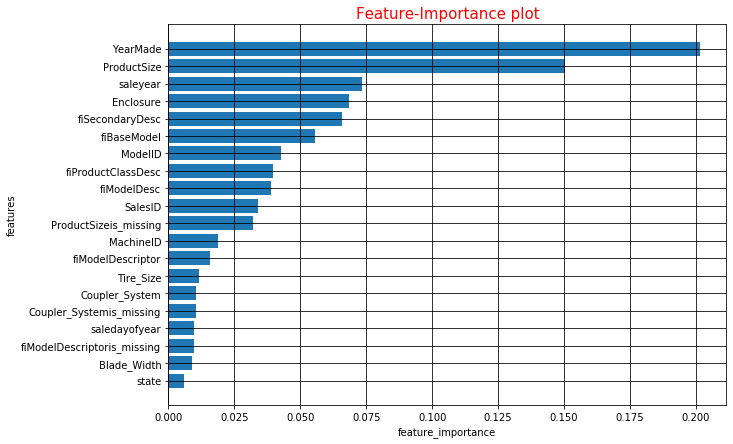

In [109]:
# call the function
plot_features(X_train.columns, ideal_model.feature_importances_)

**Hence the plot shows the fact that the factor year made is the factor which mostly affects the model prepared**

In [110]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [111]:
# Even the product size affecs the model
# we can see that
df['ProductSize'].value_counts()

Medium            2030
Large / Medium    1695
Mini               997
Small              724
Large              444
Compact            158
Name: ProductSize, dtype: int64